In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
x=np.linspace(-10,15,500)

In [4]:
def poly(x):
    y=0.2*x**3-0.1*x**2-10*x
    return y

In [5]:
y=poly(x)

In [6]:
poly(47.7)

21001.737600000004

In [7]:
fig.set_figheight(15)
fig.set_figwidth(15)
plt.figure(figsize=[5,5])
ax = plt.axes()
plt.plot(x,poly(x))
# fixed y
plt.plot([-10.5, 9], [47.7, 47.7], color='r', linestyle='-', linewidth=1)
plt.plot([9, 9], [-120, 47.7], color='r', linestyle='-', linewidth=1)
# y lower
plt.plot([-10.5, 8], [16, 16], color='r', linestyle='--', linewidth=1)
plt.plot([8,8], [-120, 16], color='r', linestyle='--', linewidth=1)
plt.plot([-5.75,-5.75], [-120, 16], color='r', linestyle='--', linewidth=1)
# yupper
plt.plot([-10.5, 9.7], [76.12, 76.12], color='r', linestyle='--', linewidth=1)
plt.plot([9.7,9.7], [-120, 76.12], color='r', linestyle='--', linewidth=1)
plt.plot([-1.8,-1.8], [-120, 16], color='r', linestyle='--', linewidth=1)
plt.xlim([-10,12])
plt.ylim([-120,100])

#ticks
ax.set_yticks([47.7])
ax.set_yticklabels(['$y^{obj}$'],fontsize=15)

ax.set_xticks([9])
ax.set_xticklabels(['$\^{x}$'],fontsize=15
                  )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

y2=np.copy(y)
y2[y2<16]=16
y2[y2>76.12]=76.12

ax.fill_between(x,-500,y,where=(x>=-5.75) & (x<-1.8), alpha=0.5,color='cornflowerblue')
ax.fill_between(x,-500,y,where=(x>=8) & (x<=9.7), alpha=0.5,color='cornflowerblue')
ax.fill_between(x,y2,76.12,alpha=0.5,where=(x<9.7),color='cornflowerblue')

ax.plot(1, -120, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(-10, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

trans = ax.get_xaxis_transform()
ax.annotate('', xy=(1, -.4), xycoords=trans, ha="center", va="top")
ax.plot([-5.75,-1.8],[-.05,-.05], color="k", transform=trans, clip_on=False)
ax.plot([8,9.7],[-.1,-.1], color="k", transform=trans, clip_on=False)
ax.plot([9.7,9.7],[-.095,-.105], color="k", transform=trans, clip_on=False)
ax.plot([8,8],[-.095,-.105], color="k", transform=trans, clip_on=False)
ax.plot([-5.75,-5.75],[-.09/2,-.11/2], color="k", transform=trans, clip_on=False)
ax.plot([-1.8,-1.8],[-.09/2,-.11/2], color="k", transform=trans, clip_on=False)
plt.savefig('calibration.pdf')  
plt.show()


NameError: name 'fig' is not defined

In [ ]:
plt.figure(figsize=[5,5])
ax = plt.axes()
plt.plot(x,poly(x))
# fixed y
plt.plot([-10.5, 9], [47.7, 47.7], color='r', linestyle='-', linewidth=1)
plt.plot([9, 9], [-120, 47.7], color='r', linestyle='-', linewidth=1)
plt.xlim([-10,12])
plt.ylim([-120,100])
#ticks
ax.set_yticks([47.7])
ax.set_yticklabels(['$y^{obj}$'],fontsize=15)

ax.set_xticks([9])
ax.set_xticklabels(['$\^{x}$'],fontsize=15
                  )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.plot(1, -120, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(-10, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
plt.savefig('calibrationNoUncertainty.pdf')  
plt.show()


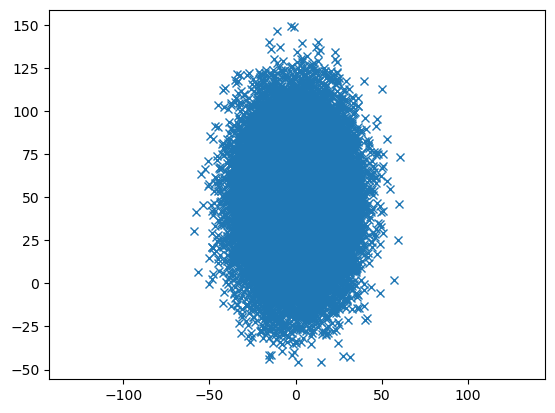

In [9]:
mean = [0, 47.7]
cov = [[200, 0], [0, 600]]  # diagonal covariance
x1, y1 = np.random.multivariate_normal(mean, cov, 50000).T
plt.plot(x1, y1, 'x')
plt.axis('equal')
plt.show()

<Figure size 640x480 with 0 Axes>

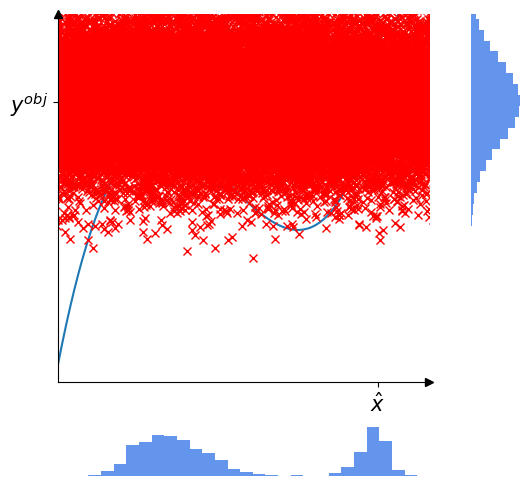

In [10]:
plt.figure()
fig, axes = plt.subplots(2,2,gridspec_kw={'height_ratios': [5, .7],'width_ratios': [5,.7]},figsize=(6, 6))
ax1, ax2, ax3, ax4 = axes.flatten()

ax1.plot(x,poly(x))
ax1.plot(x1, y1, 'x',color='r')
# fixed y
#plt.plot([-10.5, 9], [47.7, 47.7], color='r', linestyle='-', linewidth=1)
#plt.plot([9, 9], [-120, 47.7], color='r', linestyle='-', linewidth=1)
ax1.set_xlim([-10,12])
ax1.set_ylim([-120,100])
#ticks
ax1.set_yticks([47.7])
ax1.set_yticklabels(['$y^{obj}$'],fontsize=15)

ax1.set_xticks([9])
ax1.set_xticklabels(['$\^{x}$'],fontsize=15)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.plot(1, -120, ">k", transform=ax1.get_yaxis_transform(), clip_on=False)
ax1.plot(-10, 1, "^k", transform=ax1.get_xaxis_transform(), clip_on=False)

binwidth= 0.75
tol=5

ax3.hist(x1[np.abs(y1-poly(x1))<tol],bins=np.arange(min(x1[np.abs(y1-poly(x1))<tol]), max(x1[np.abs(y1-poly(x1))<tol]) + binwidth, binwidth),color='cornflowerblue',lw=1)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xlim([-10,12])

ax2.hist(y1,orientation="horizontal",color='cornflowerblue',bins=30)
ax2.set_ylim([-120,100])

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])

plt.savefig('calibrationNoUncertaintyGaussian.pdf')  
plt.show()

(array([   30.,   340.,  2166.,  7558., 14160., 14762.,  7996.,  2510.,
          448.,    30.]),
 array([-51.19823365, -31.56166389, -11.92509414,   7.71147562,
         27.34804537,  46.98461513,  66.62118488,  86.25775464,
        105.89432439, 125.53089414, 145.1674639 ]),
 <BarContainer object of 10 artists>)

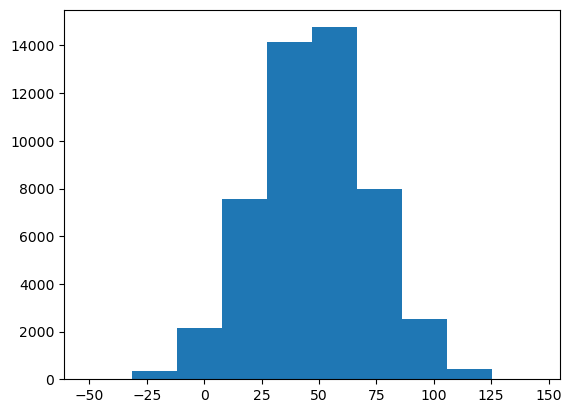

In [118]:
plt.hist(y1)

In [111]:
x1[np.abs(y1-poly(x1))<2]

array([ 7.54405733, -3.31205229, -3.51346224, -5.23813138, -2.04019602,
        9.20815857, -4.33078807, -5.32491357, -4.9417153 ,  9.63740458,
       -4.30732764, -7.25407543,  8.84496239, -1.91449445, -6.51718388,
       -3.1387499 ,  8.3958276 , -5.53050004,  9.19573631,  8.79433618,
       -1.37668306, -5.62239837,  8.82546295, -2.28596279,  4.80351633,
       -5.21181221,  8.59508175, -2.68768857, -6.1506603 ,  0.01618252,
        9.98755657, -4.60716736, -2.69404665,  7.95245358, -2.30968525,
        0.42643199, -4.30100257, -2.0342821 ,  7.39933016, -3.45982987,
       -4.32130778, -3.24406696,  9.57108839, 10.29461263, -4.39561186,
       -1.50579175, -3.94094106,  9.02670491, -1.79370118, -4.37370875,
       -4.78017884, -3.85090984, 10.13614344, -1.99726133, -6.40714327,
       -3.16482245,  1.72980909, -1.09133057, -4.73740789,  9.09586348,
       -3.79127906, -3.08040921, -2.3038765 , -4.51285491,  8.37024321,
       -2.7767148 ,  7.92488782,  7.5809153 , -0.42407061, -4.00

(array([9., 7., 6., 4., 0., 0., 0., 0., 0., 3.]),
 array([-5.25375653, -3.79371498, -2.33367343, -0.87363187,  0.58640968,
         2.04645123,  3.50649279,  4.96653434,  6.42657589,  7.88661745,
         9.346659  ]),
 <BarContainer object of 10 artists>)

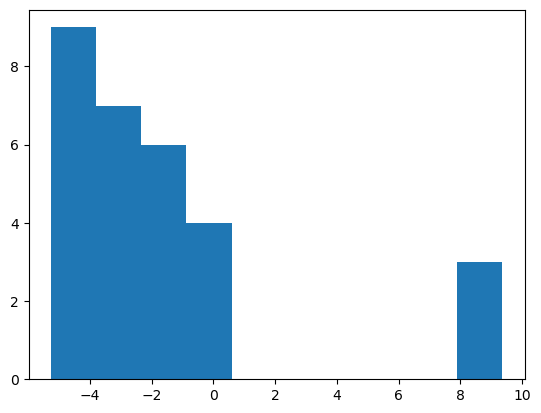

In [12]:
plt.hist(x1[np.abs(y1-poly(x1))<5])